In [1]:
#Importing the Liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [2]:
#Time Period Between which stocks will be fetched
start=datetime.datetime(2014,5,19)
end=datetime.datetime(2019,5,18)

In [3]:
apple=web.DataReader("AAPL",'yahoo',start,end)
google=web.DataReader("GOOGL",'yahoo',start,end)
fb=web.DataReader("FB",'yahoo',start,end)

In [4]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-05-19,86.761429,85.332855,85.407143,86.370003,79438800.0,78.438400
2014-05-20,86.628571,85.818573,86.358574,86.387146,58709000.0,78.453949
2014-05-21,86.671425,86.008568,86.261429,86.615715,49214900.0,78.661545
2014-05-22,87.121429,86.300003,86.657143,86.752853,50190000.0,78.786079
2014-05-23,87.818573,86.638573,86.750000,87.732857,58052400.0,79.676086


In [5]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-05-19,539.349976,525.659973,528.880005,538.830017,1976500,538.830017
2014-05-20,546.349976,536.570007,540.000000,540.390015,2425300,540.390015
2014-05-21,549.750000,542.109985,542.900024,549.700012,1564700,549.700012
2014-05-22,557.960022,551.000000,552.200012,555.450012,2149700,555.450012
2014-05-23,565.000000,554.169983,558.130005,563.799988,2672500,563.799988


In [7]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-05-19,59.560001,57.570000,57.889999,59.209999,43034000,59.209999
2014-05-20,60.189999,58.180000,59.500000,58.560001,53931000,58.560001
2014-05-21,60.500000,58.250000,58.560001,60.490002,58992000,60.490002
2014-05-22,61.480000,60.400002,60.939999,60.520000,54200000,60.520000
2014-05-23,61.450001,60.150002,60.410000,61.349998,38294000,61.349998


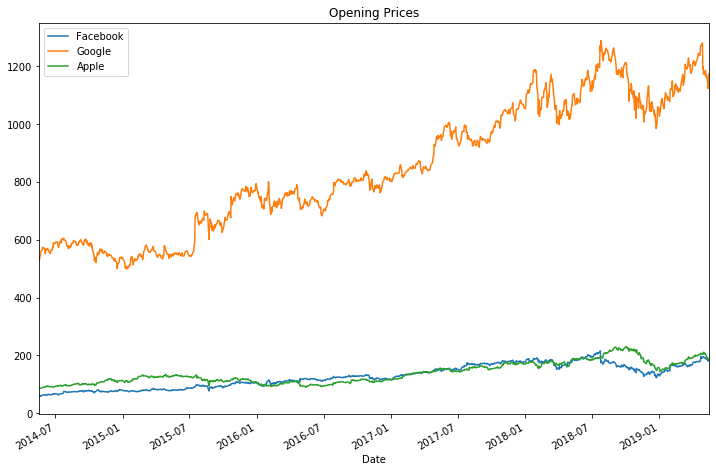

In [8]:
fb['Open'].plot(label='Facebook',figsize=(12,8),title="Opening Prices")
google['Open'].plot(label='Google',figsize=(12,8),title="Opening Prices")
apple['Open'].plot(label='Apple',figsize=(12,8),title="Opening Prices")
plt.legend()

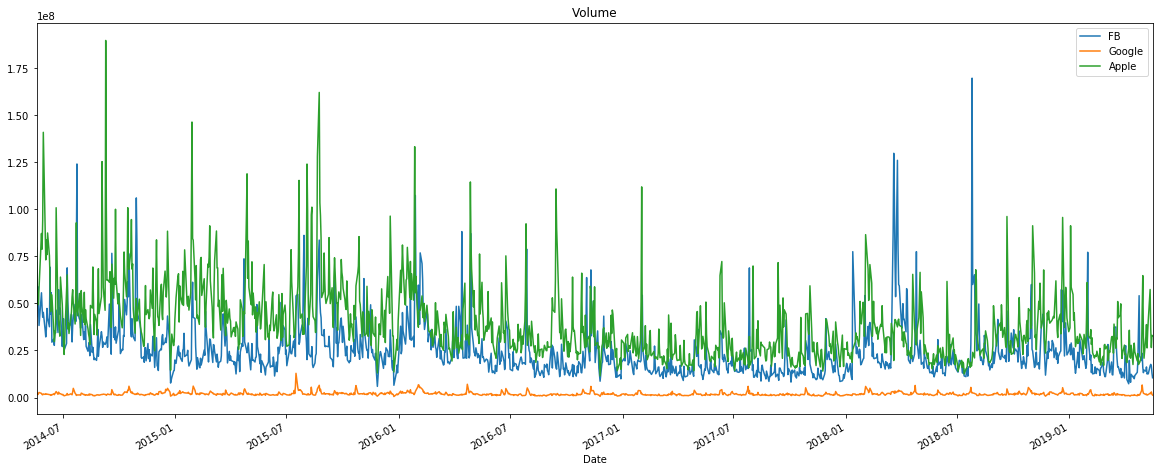

In [9]:
fb['Volume'].plot(label='FB',figsize=(20,8),title="Volume")
google['Volume'].plot(label='Google',figsize=(20,8),title="Volume")
apple['Volume'].plot(label='Apple',figsize=(20,8),title="Volume")
plt.legend()

In [10]:
fb["Total Trade"]=fb['Open']*fb['Volume']
google["Total Trade"]=google['Open']*google['Volume']
apple["Total Trade"]=apple['Open']*apple['Volume']

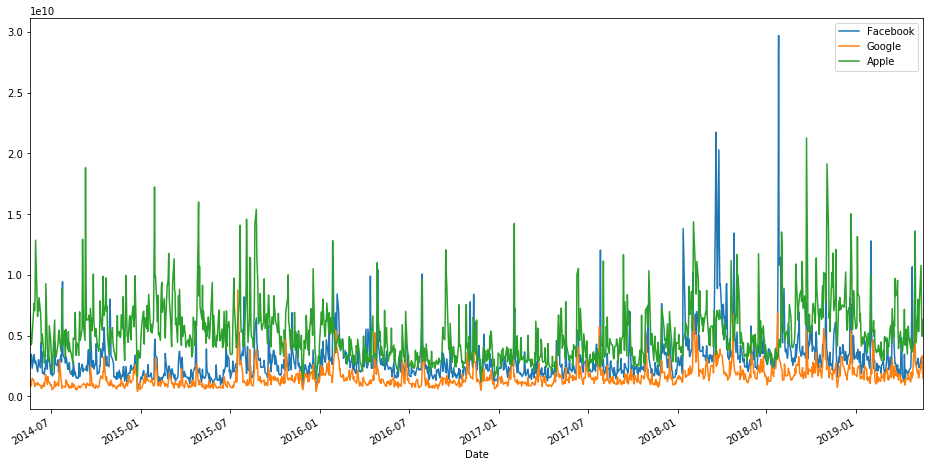

In [11]:
fb["Total Trade"].plot(label='Facebook',figsize=(16,8))
google["Total Trade"].plot(label='Google',figsize=(16,8))
apple["Total Trade"].plot(label='Apple',figsize=(16,8))
plt.legend()

Text(0.5, 1.0, 'Facebook')

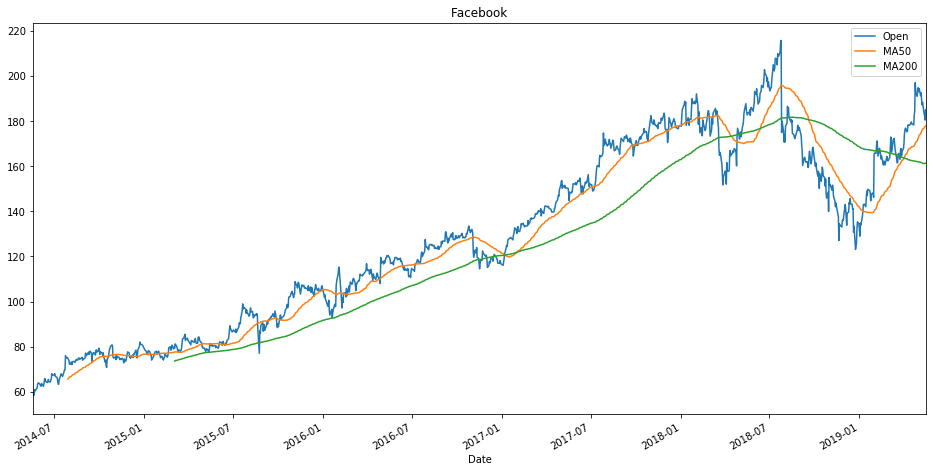

In [12]:
fb["MA50"]=fb["Open"].rolling(50).mean()
fb["MA200"]=fb["Open"].rolling(200).mean()
fb[["Open","MA50","MA200"]].plot(figsize=(16,8))
plt.title('Facebook')

Text(0.5, 1.0, 'Google')

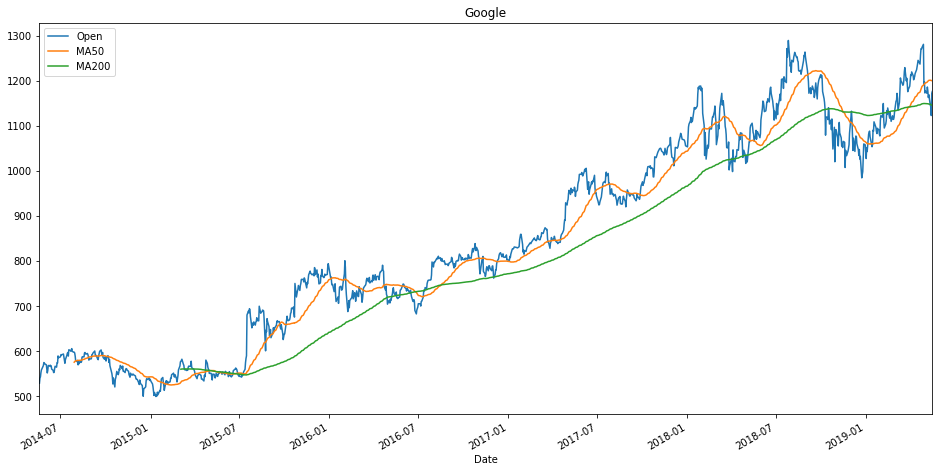

In [13]:
google["MA50"]=google["Open"].rolling(50).mean()
google["MA200"]=google["Open"].rolling(200).mean()
google[["Open","MA50","MA200"]].plot(figsize=(16,8))
plt.title('Google')

Text(0.5, 1.0, 'Apple')

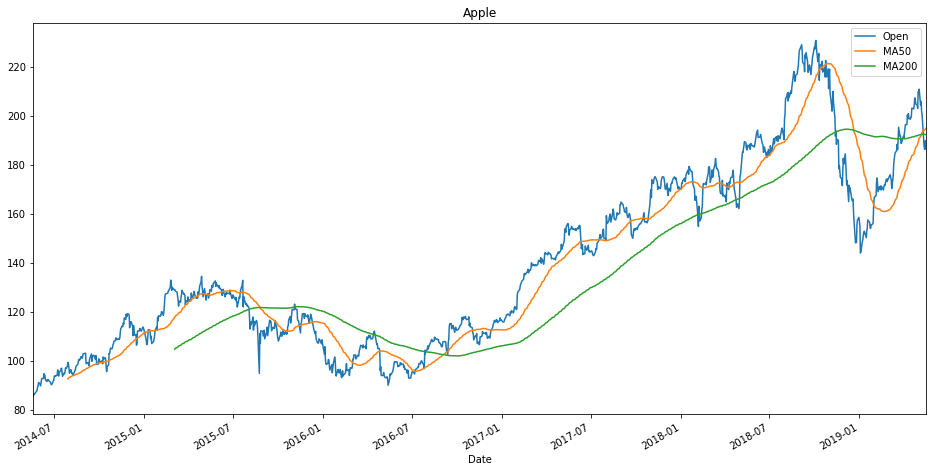

In [14]:
apple["MA50"]=apple["Open"].rolling(50).mean()
apple["MA200"]=apple["Open"].rolling(200).mean()
apple[["Open","MA50","MA200"]].plot(figsize=(16,8))
plt.title('Apple')

In [15]:
from pandas.plotting import scatter_matrix
car_comp=pd.concat([fb["Open"],google["Open"],apple["Open"]],axis=1)
car_comp.columns=["Facebook Open","Google Open","Apple Open"]
car_comp.head()

,Facebook Open,Google Open,Apple Open
Date,,,
2014-05-19,57.889999,528.880005,85.407143
2014-05-20,59.500000,540.000000,86.358574
2014-05-21,58.560001,542.900024,86.261429
2014-05-22,60.939999,552.200012,86.657143
2014-05-23,60.410000,558.130005,86.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C21D7088>,
      dtype=object)

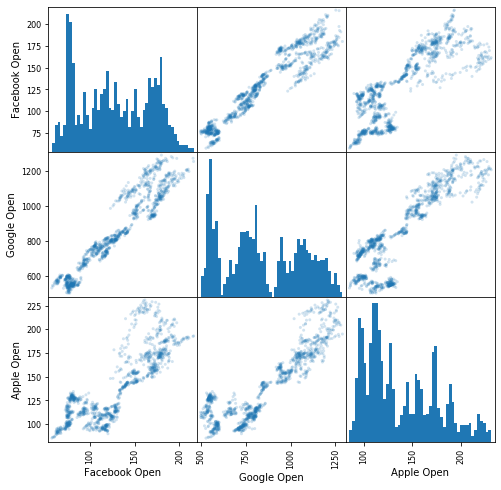

In [16]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={"bins":50})

In [17]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [19]:
apple_reset=apple.loc['2014-05'].reset_index()
apple_reset["date-ax"]=apple_reset["Date"].apply(lambda date:date2num(date))
apple_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2014-05-19,86.761429,85.332855,85.407143,86.370003,79438800.0,78.438400,6.784641e+09,NaN,NaN,735372.0
1,2014-05-20,86.628571,85.818573,86.358574,86.387146,58709000.0,78.453949,5.070026e+09,NaN,NaN,735373.0
2,2014-05-21,86.671425,86.008568,86.261429,86.615715,49214900.0,78.661545,4.245348e+09,NaN,NaN,735374.0
3,2014-05-22,87.121429,86.300003,86.657143,86.752853,50190000.0,78.786079,4.349322e+09,NaN,NaN,735375.0
4,2014-05-23,87.818573,86.638573,86.750000,87.732857,58052400.0,79.676086,5.036046e+09,NaN,NaN,735376.0


In [20]:
list_of_cols=["date-ax","Open","High","Low","Close"]
apple_values=[tuple(vals) for vals in apple_reset[list_of_cols].values]

In [22]:
google_reset=apple.loc['2014-05'].reset_index()
google_reset["date-ax"]=google_reset["Date"].apply(lambda date:date2num(date))
google_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2014-05-19,86.761429,85.332855,85.407143,86.370003,79438800.0,78.438400,6.784641e+09,NaN,NaN,735372.0
1,2014-05-20,86.628571,85.818573,86.358574,86.387146,58709000.0,78.453949,5.070026e+09,NaN,NaN,735373.0
2,2014-05-21,86.671425,86.008568,86.261429,86.615715,49214900.0,78.661545,4.245348e+09,NaN,NaN,735374.0
3,2014-05-22,87.121429,86.300003,86.657143,86.752853,50190000.0,78.786079,4.349322e+09,NaN,NaN,735375.0
4,2014-05-23,87.818573,86.638573,86.750000,87.732857,58052400.0,79.676086,5.036046e+09,NaN,NaN,735376.0


In [23]:
list_of_cols=["date-ax","Open","High","Low","Close"]
google_values=[tuple(vals) for vals in google_reset[list_of_cols].values]

In [26]:
fb_reset=fb.loc['2014-05'].reset_index()
fb_reset["date-ax"]=fb_reset["Date"].apply(lambda date:date2num(date))
fb_reset.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
4,2014-05-23,61.450001,60.150002,60.410000,61.349998,38294000,61.349998,2.313341e+09,NaN,NaN,735376.0
5,2014-05-27,63.509998,61.570000,61.619999,63.480000,55682000,63.480000,3.431125e+09,NaN,NaN,735380.0
6,2014-05-28,64.139999,62.619999,63.389999,63.509998,47795000,63.509998,3.029725e+09,NaN,NaN,735381.0
7,2014-05-29,64.300003,63.509998,63.840000,63.830002,42700000,63.830002,2.725968e+09,NaN,NaN,735382.0
8,2014-05-30,64.169998,62.560001,63.950001,63.299999,45253500,63.299999,2.893961e+09,NaN,NaN,735383.0


In [27]:
list_of_cols=["date-ax","Open","High","Low","Close"]
fb_values=[tuple(vals) for vals in fb_reset[list_of_cols].values]

In [28]:
mondays=WeekdayLocator(MONDAY)  #major ticks on monday
alldays=DayLocator()            #minor ticks on monday
weekFormatter=DateFormatter("%b %d")   #eg Jan 12
dayFormatter=DateFormatter("%d")

Text(0.5, 1.0, 'Google')

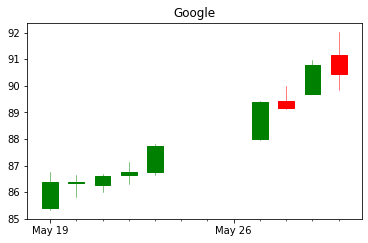

In [29]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,google_values,width=0.6,colorup='g',colordown='r')
plt.title('Google')

Text(0.5, 1.0, 'Apple')

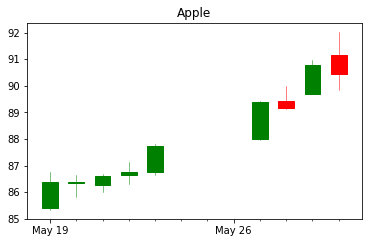

In [30]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,apple_values,width=0.6,colorup='g',colordown='r')
plt.title('Apple')

Text(0.5, 1.0, 'Facebook')

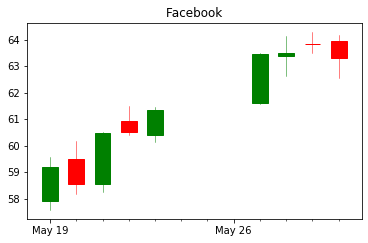

In [31]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,fb_values,width=0.6,colorup='g',colordown='r')
plt.title('Facebook')

In [32]:
apple["returns"]=(apple["Close"]/apple["Close"].shift(1))-1
apple["returns"]=apple["Close"].pct_change(1)
apple["returns"].head()  #-ve for money loss

Date
2014-05-19         NaN
2014-05-20    0.000198
2014-05-21    0.002646
2014-05-22    0.001583
2014-05-23    0.011296
Name: returns, dtype: float64

In [33]:
google["returns"]=(google["Close"]/google["Close"].shift(1))-1
google["returns"]=google["Close"].pct_change(1)
google["returns"].head()   #-ve for money loss

Date
2014-05-19         NaN
2014-05-20    0.002895
2014-05-21    0.017228
2014-05-22    0.010460
2014-05-23    0.015033
Name: returns, dtype: float64

In [34]:
fb["returns"]=(fb["Close"]/fb["Close"].shift(1))-1
fb["returns"]=fb["Close"].pct_change(1)
fb["returns"].head()     #-ve for money loss

Date
2014-05-19         NaN
2014-05-20   -0.010978
2014-05-21    0.032958
2014-05-22    0.000496
2014-05-23    0.013714
Name: returns, dtype: float64

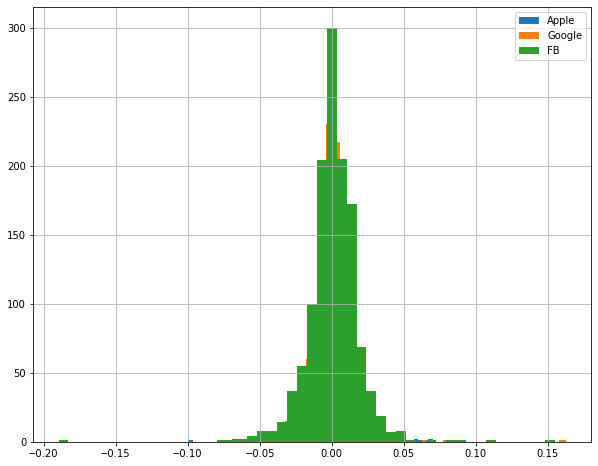

In [35]:
apple["returns"].hist(bins=50,label="Apple",figsize=(10,8))
google["returns"].hist(bins=50,label="Google",figsize=(10,8))
fb["returns"].hist(bins=50,label="FB",figsize=(10,8))
plt.legend()

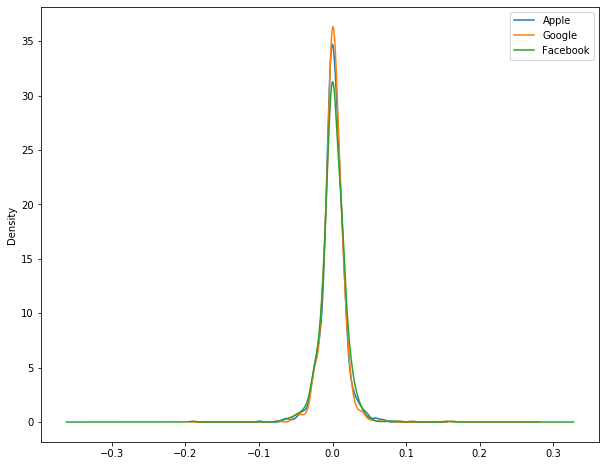

In [36]:
apple["returns"].plot(kind='kde',label="Apple",figsize=(10,8))
google["returns"].plot(kind='kde',label="Google",figsize=(10,8))
fb["returns"].plot(kind='kde',label="Facebook",figsize=(10,8))
plt.legend()

In [37]:
box_df=pd.concat([apple['returns'],google['returns'],fb['returns']],axis=1)
box_df.columns=['Apple Returns','Google Returns','Facebook Returns']

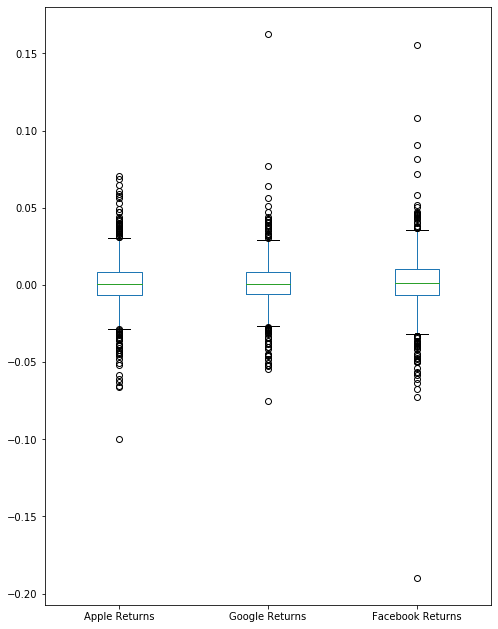

In [38]:
box_df.plot(kind='box',figsize=(8,11))

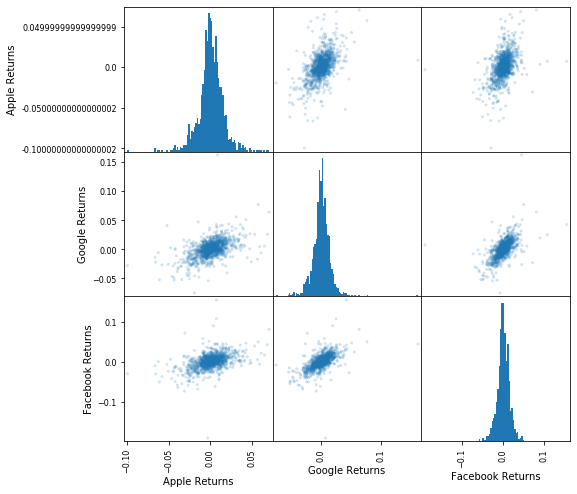

In [39]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

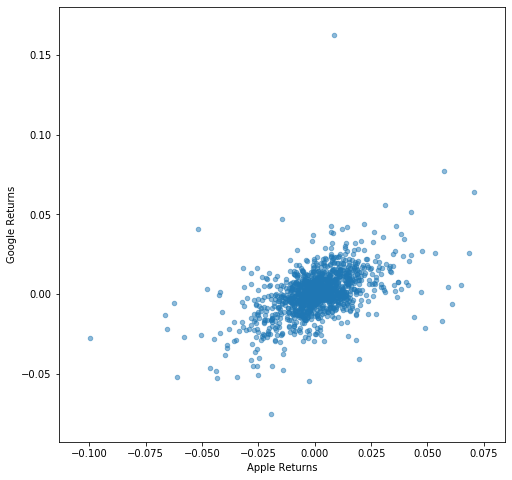

In [40]:
box_df.plot(kind='scatter',x="Apple Returns",y="Google Returns",alpha=0.5,figsize=(8,8))

In [41]:
apple["Cummulative Returns"]=(1+apple["returns"]).cumprod()
google["Cummulative Returns"]=(1+google["returns"]).cumprod()
fb["Cummulative Returns"]=(1+fb["returns"]).cumprod()

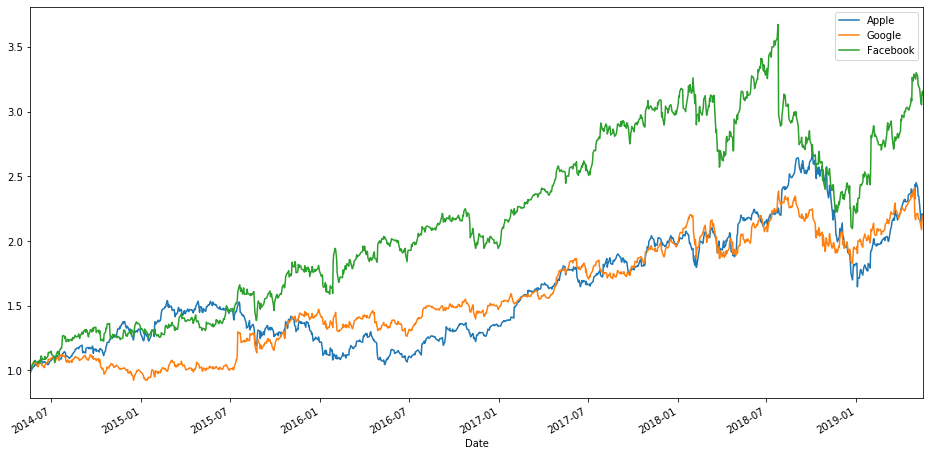

In [42]:
apple["Cummulative Returns"].plot(label="Apple",figsize=(16,8))
google["Cummulative Returns"].plot(label="Google",figsize=(16,8))
fb["Cummulative Returns"].plot(label="Facebook",figsize=(16,8))
plt.legend()

# Predicting the stock using the RNN model

In [44]:
#Google
train = google.iloc[:, 1:2].values

In [45]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train)

In [46]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [48]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [49]:
# Initialising the RNN
regressor = Sequential()

In [50]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [51]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [52]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [53]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [54]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [55]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0435
Epoch 2/5
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0067
Epoch 3/5
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0062
Epoch 4/5
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0058
Epoch 5/5
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044


In [58]:
start=datetime.datetime(2019,6,1)
end=datetime.datetime(2019,7,1)
test_dataset=web.DataReader("GOOGL",'yahoo',start,end)
test = test_dataset.iloc[:, 1:2].values

In [60]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((google['Open'], test_dataset['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

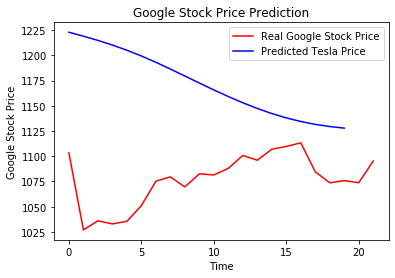

In [61]:
# Visualising the results
plt.plot(test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#To check for Ford And Gm change tesla to ford or gm